In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn import datasets
dataset=pd.read_csv('d:\ipython\petrol_consumption.csv')


In [2]:
dataset
dataset.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [3]:
X=pd.DataFrame(dataset.iloc[:,:-1])
y=pd.DataFrame(dataset.iloc[:,-1])

In [4]:
X.tail()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%)
43,7.0,3745,2611,0.508
44,6.0,5215,2302,0.672
45,9.0,4476,3942,0.571
46,7.0,4296,4083,0.623
47,7.0,5002,9794,0.593


In [5]:
y.tail()

,Petrol_Consumption
43,591
44,782
45,510
46,610
47,524


In [6]:
from sklearn.model_selection import KFold

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2)

In [7]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=20, criterion='gini', random_state=1, max_depth=4)
classifier.fit(X_train, y_train)

<ipython-input-7-83d3c0d4cbf6>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


RandomForestClassifier(max_depth=4, n_estimators=20, random_state=1)

In [8]:
y_pred=classifier.predict(X_test)

In [9]:
#from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
#print(confusion_matrix(y_test, y_pred))
#print(classification_report(y_test, y_pred))
#print(accuracy_score(y_test, y_pred))

In [10]:
import pandas as pd
feature_imp=pd.Series(classifier.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_imp

Paved_Highways                  0.304707
Average_income                  0.257780
Population_Driver_licence(%)    0.228392
Petrol_tax                      0.209121
dtype: float64

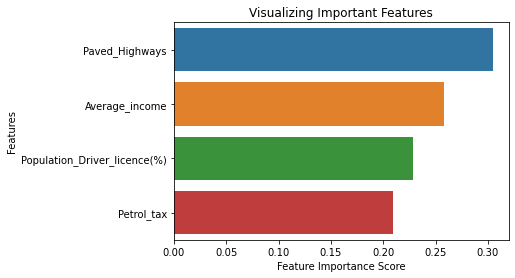

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [12]:
from sklearn.ensemble import RandomForestClassifier

In [13]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
print(round(acc_random_forest,2), "%")

100.0 %


<ipython-input-13-6c66c22c70b0>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest.fit(X_train, y_train)


In [14]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 73.8
Mean Squared Error: 8189.6
Root Mean Squared Error: 90.49640876852517


In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
# KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

acc_knn = round(knn.score(X_train, y_train) * 100, 2)
print(round(acc_knn,2), "%")

26.32 %


<ipython-input-16-3f377d75de75>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train, y_train)


In [17]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 134.2
Mean Squared Error: 24419.0
Root Mean Squared Error: 156.26579920123277


In [18]:
from sklearn.svm import SVC, LinearSVC

In [19]:
# Linear SVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)

y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)
print(round(acc_linear_svc,2), "%")

5.26 %


C:\Users\USER2018\anaconda4\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\USER2018\anaconda4\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [20]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 53.9
Mean Squared Error: 4163.9
Root Mean Squared Error: 64.5282883702954


In [21]:
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier

In [22]:
# stochastic gradient descent (SGD) learning
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)

sgd.score(X_train, y_train)

acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)


print(round(acc_sgd,2), "%")

5.26 %


C:\Users\USER2018\anaconda4\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [23]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 125.7
Mean Squared Error: 19993.9
Root Mean Squared Error: 141.39978783576728


In [24]:
from sklearn.linear_model import Perceptron

In [25]:
# Perceptron
perceptron = Perceptron(max_iter=5)
perceptron.fit(X_train, y_train)

y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, y_train) * 100, 2)
print(round(acc_perceptron,2), "%")

5.26 %


C:\Users\USER2018\anaconda4\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\USER2018\anaconda4\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


In [26]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 159.7
Mean Squared Error: 29697.5
Root Mean Squared Error: 172.32962600783418


In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, y_train) * 100, 2)
print(round(acc_log,2), "%")

39.47 %


C:\Users\USER2018\anaconda4\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\USER2018\anaconda4\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 120.5
Mean Squared Error: 20691.9
Root Mean Squared Error: 143.84679349919483


In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)

acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
print(round(acc_decision_tree,2), "%")

100.0 %


In [32]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 74.4
Mean Squared Error: 9290.4
Root Mean Squared Error: 96.38672107712763


In [33]:
from sklearn.naive_bayes import GaussianNB

In [34]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)

y_pred = gaussian.predict(y_test)

acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
print(round(acc_gaussian,2), "%")

100.0 %


C:\Users\USER2018\anaconda4\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [35]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 69.5
Mean Squared Error: 7522.7
Root Mean Squared Error: 86.73349987173353


In [36]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)

result_df.head(8)

,Model,Score
3,Random Forest,100.00
4,Naive Bayes,100.00
7,Decision Tree,100.00
2,Logistic Regression,39.47
1,KNN,26.32
0,Support Vector Machines,5.26
5,Perceptron,5.26
6,Stochastic Gradient Decent,5.26


C:\Users\USER2018\anaconda4\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\USER2018\anaconda4\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


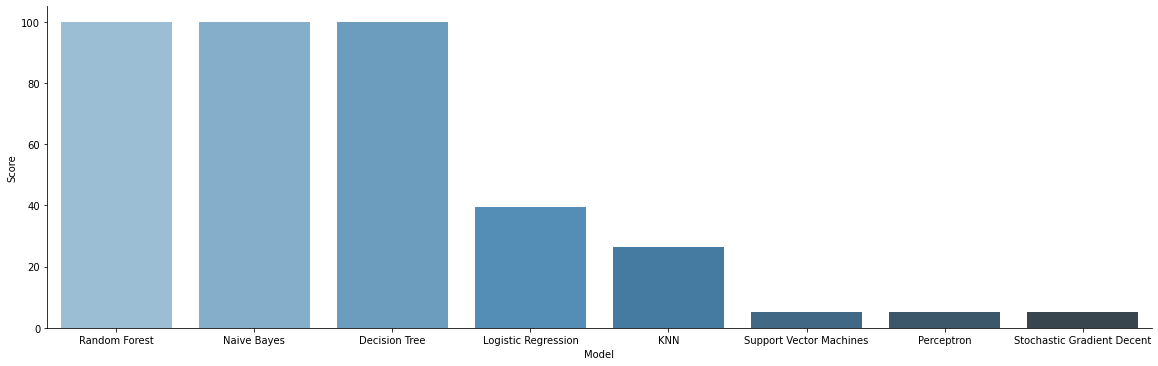

In [37]:
bestmodelgraph = result_df.head(8)
ax = sns.factorplot("Model", y="Score", data=bestmodelgraph,
                palette='Blues_d',aspect=3.2,kind='bar')

In [38]:
# data: 
# https://github.com/ShauryaBhandari/Machine-Learning/blob/master/Random%20Forest/petrol_consumption.csv


# data: (transfer data from cancer.data.csv to cancer.data1.csv with fewer column)
# https://raw.githubusercontent.com/pkmklong/Breast-Cancer-Wisconsin-Diagnostic-DataSet/master/data.csv

# code:
# https://intellipaat.com/blog/what-is-random-forest-algorithm-in-python/
# https://www.kaggle.com/chenfafa/predictive-model-90-accuracy-titanic/edit